<a href="https://colab.research.google.com/github/mongbleu/Project_session1/blob/main/ds-section2-sprint3%20/%20n234-interpreting-ml-model%20/%20n234a-interpreting-ml-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 3 / NOTE 4*

# 📝 Assignment
---

# Interpreting ML Model

파일경로 : n234-interpreting-ml-model/n234a-interpreting-ml-model.ipynb

### 1) PDP를 만들어 모델을 설명하세요
- 한 특성에 대한 PDP를 만들고 모델을 설명하세요
- 두 특성간 관계에 대한 PDP를 만들고 모델을 설명하세요
- **(Urclass Quiz) Boston 데이터의 train 데이터를 사용해 PDP plots을 그린 후, 집값에 대해 양의 선형관계를 나타내는 특성을 고르세요.**
    - 1) LSTAT
    - 2) B
    - 3) TAX
    - 4) AGE


### SHAP library 설치를 위한 코드

In [ ]:
!which python # should return /usr/local/bin/python
!python --version
%env PYTHONPATH=
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.9.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.9.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.9.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
!which conda  # should return /usr/local/bin/conda
!conda --version

In [ ]:
!python --version 

Python 3.7.9


In [ ]:
# list the files/directories in the current directory
!ls /usr/local/lib/python3.7/dist-packages
# requirements.txt 생성
p = """
gensim==3.8.1
pyLDAvis==2.1.2
spacy==2.2.3
scikit-learn==0.23.1
seaborn==0.11.0
squarify==0.4.3
ipykernel
nltk
pandas
scipy
"""

c = """text_file = open("requirements.txt", "w+");text_file.write(p);text_file.close()""" 

exec(c)

In [ ]:
!conda create -n envname python==3.7

In [ ]:
!source activate envname && conda env list

In [ ]:
!conda install -c conda-forge shap

In [ ]:
!conda install -c conda-forge pdpbox

### Urclass 코드

In [ ]:
### (Urclass Quiz) 이곳에서 과제를 진행해 주세요 ###
import sklearn
import xgboost
import shap
from sklearn.model_selection import train_test_split

shap.initjs();

df, target = shap.datasets.boston()
X_train,X_test,y_train,y_test = train_test_split(df, target, test_size=0.2, random_state=2)

model = xgboost.XGBRegressor().fit(X_train, y_train)

### Draw PDP plots ###


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=60

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_interact, pdp_plot, pdp_interact_plot

In [ ]:
def plot_pdp (feature) :
  isolated = pdp_isolate(
      model=model,
      dataset=X_test,
      model_features=X_test.columns,
      feature=feature,
      grid_type='percentile',
      num_grid_points=30
  )
  return pdp_plot(isolated, feature_name=feature, plot_pts_dist=True)


In [ ]:
plot_pdp('TAX')

In [ ]:
plot_pdp('AGE')

In [ ]:
plot_pdp('B')

In [ ]:
plot_pdp('LSTAT')

In [ ]:
#pdp_interact 시각화하기

In [ ]:
def pdp_interact_newplot(feature1, feature2) :
  interact = pdp_interact(
      model=model,
      dataset=X_test,
      model_features=X_test.columns,
      features=[feature1,feature2]
  )
  return pdp_interact_plot(interact, plot_type='grid', feature_names=[feature1,feature2])

(<Figure size 1080x1368 with 3 Axes>,
 {'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fc614c78250>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fc614cb2b50>})

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


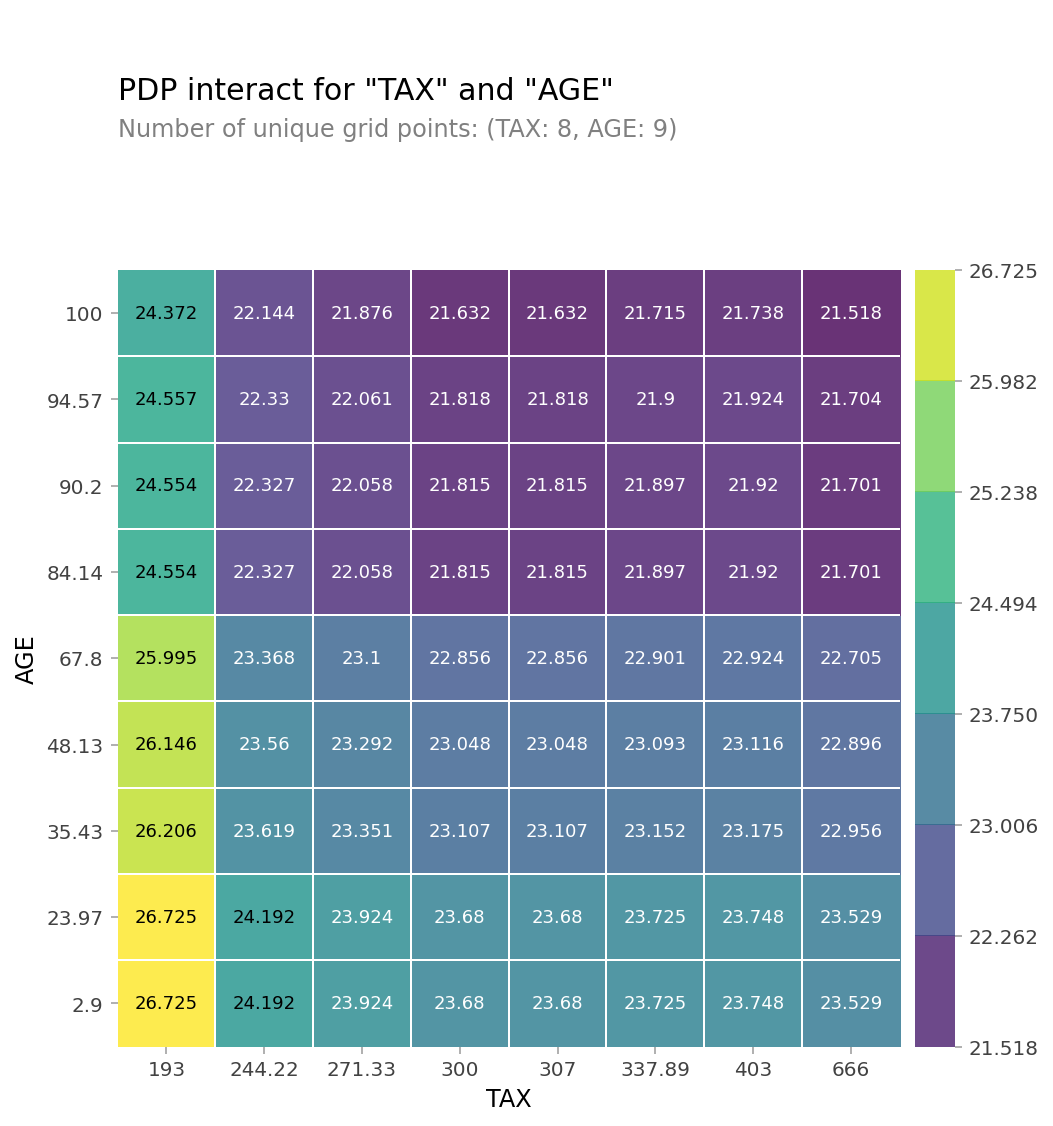

In [ ]:
plt.rcParams['figure.dpi']=144
pdp_interact_newplot('TAX','AGE')

### pdp interact 해석하기 (두개 특성의 PDP)
2개 특성의 PDP는 TAX와 AGE가 동시에 Target에 어떠한 영향을 미치는지를 파악할 수 있습니다. 위 PDP에 대한 해석은 아래와 같습니다.
- TAX가 193을 때, Age가 낮아질수록 target에 긍정적인 영향을 많이 주는 것을 알 수 있으며, Tax와 Age가 둘 다 낮을 때 target값이 가장 크게 나왔습니다
- 반면 Tax가 높아지면서 AGE가 높아지면, target에 부정적인 영향을 주는 것을 알 수 있었습니다.

### 2) SHAP 라이브러리를 사용해 최소 3개 이상 시각화를 하고 분석하세요
- **(Urclass Quiz) SHAP 라이브러리를 사용해 다음 문항 중 설명이 올바른 항목을 선택하세요.**
    - 1) force_plot을 그려보면 CRIM은 항상 가격을 낮추는 영향을 준다.
    - 2) SHAP의 summary_plot을 사용하면 permutation importance를 구할 수 있다.
    - 3) SHAP summary_plot을 그려보면 (조건: X_train, plot_type='bar') LSTAT이 가장 영향력이 큰 특성으로 보인다.
    - 4) 모델의 feature importance(model.feature_importances_)를 구하면 가장 영향력이 큰 특성이 LSTAT임을 알 수있다.


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.initjs()
shap.force_plot(
    base_value = explainer.expected_value,
    shap_values = shap_values,
    features=X_test
)

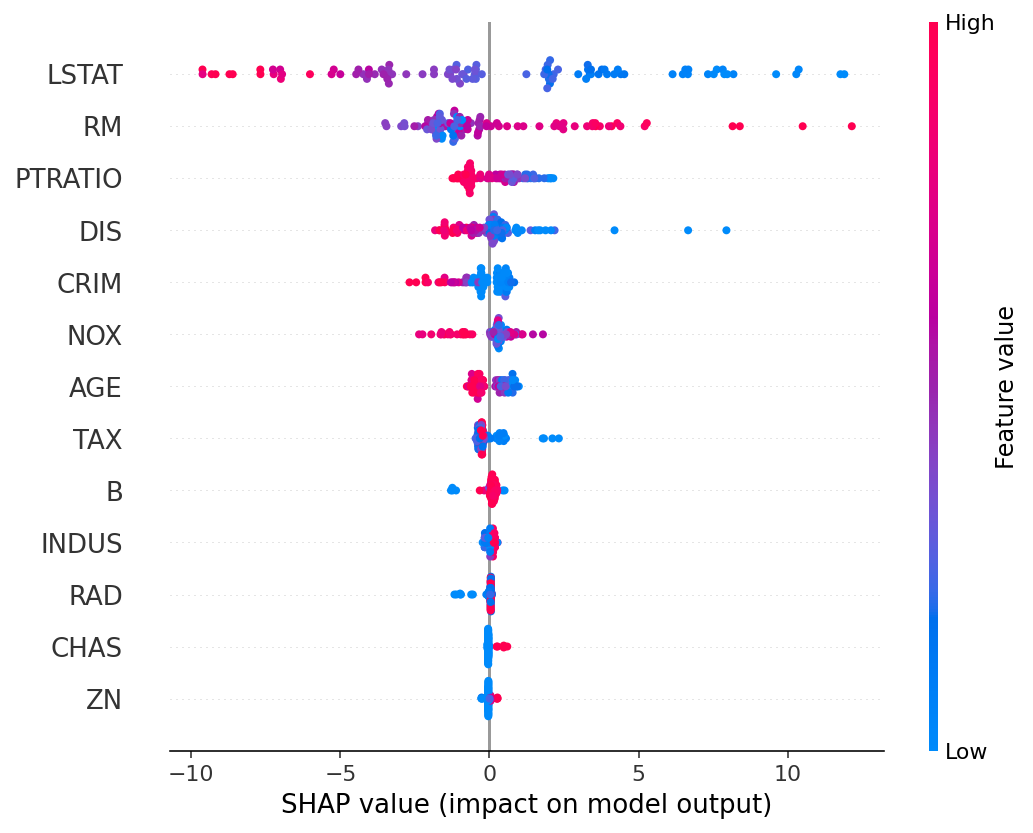

In [ ]:
#summary plot
shap_values=explainer.shap_values(X_test.iloc[:300])
shap.summary_plot(shap_values, X_test.iloc[:300])

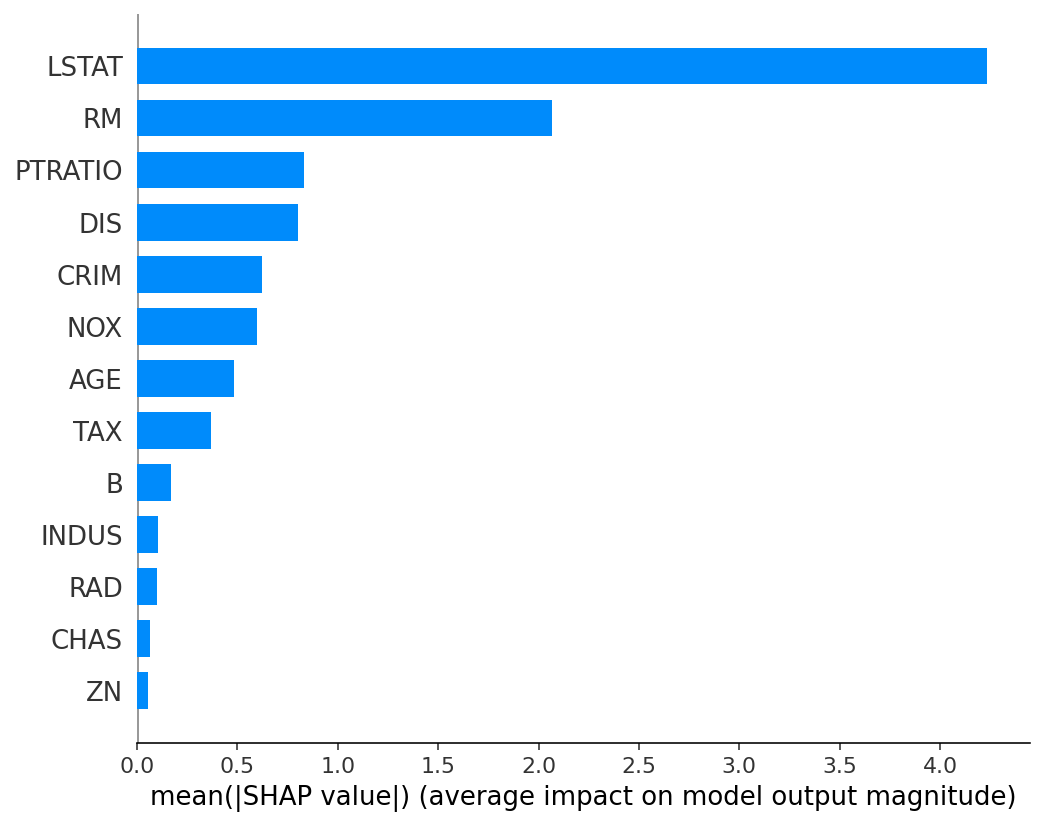

In [ ]:
#bar plot
shap.summary_plot(shap_values,X_test.iloc[:300],plot_type='bar')

In [ ]:
import pandas as pd
feature_import = pd.DataFrame(model.feature_importances_,index=X_test.columns)

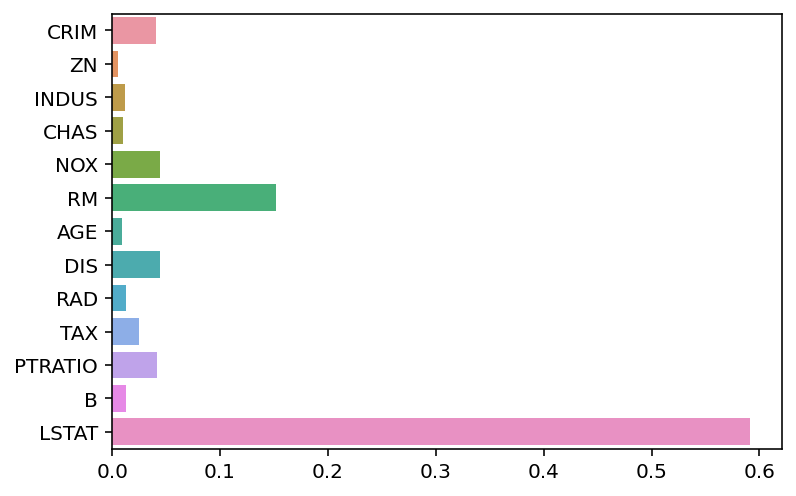

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(y=X_test.columns,x=model.feature_importances_,orient='h')


## 🔥 도전과제(Github - Discussion)

### 머신러닝 모델 해석 방법들의 장단점과 각각 어떤 방식으로 활용할 수 있을지 논의해 보세요. 


### PDP 장단점
1. 장점
    - 모든 모델에 적용가능하다(Model-agnostic)
    - 위의 이유로 모델 간 비교도 용이하다
    - 복잡한 모델의 특성들의 관계도 해석할 수 있다
    - permutation importance와 달리 특성과 예측값 사이의 양/음의 관계도 파악할 수 있다

    - pdp.interact로 2개의 변수와 타겟 예측값 사이의 관계를 알 수 있다
2. 단점
    - 특성들이 서로 독립적이라는 전제를 한다
        - 특성들이 서로 영향력을 주고 있지 않다고 전제하기 때문에, 비현실적인 특성조합을 만들어내어 해석의 정확도를 떨어트린다
        - 예시 : 몸무게 20kg - 키 200cm /  나이 1살 - 연봉 1억 등등..
    - 이상치에 민감하다...?
        - 이상치로 인해 예측값이 변하는 것은 전체 경향성을 파악할 수 없으므로, 꼭 데이터들의 분포를 함께 출력해 값을 확인해야한다
    - 샘플 간 성질이 매우 다를 경우, 평균을 내기 때문에 그 다른 특성들을 다 반영하지 못한다
        - 절반 = 100, 절반 = -100이면 평균이 0이다...! 뜨헉..!
        - ICE 확인으로 극복할 수 있음

### SHAP 장단점
1. 장점
    - 특성 간의 영향(교호작용)을 고려한 계산이 가능하다
    - 양과 음의 관계도 표현할 수 있다
2. 단점
    - 예측값 하나 하나에 대해 계산하기에 연산량이 엄청 많다

추가적으로 이렇게 모델을 사람이 이해하고 소통할 수 있도록 해석하는 방법을 XAI라고 하는데 PDP와 SHAP말고도 대리모형(surrogate model)과 국소적 대리모형인 LIME이 있다. 이 두가지 기법에 대해서는 좀 더 공부를 해봐야할 것 같다.
